# Predicting Hotel Booking Demand Analysis and Booking Cancellations Using Machine Learning with Python

In this project, I have built an end-end Industry oriented and real-world Data-driven Machine learning project in the Hotel Industry (Hospitality) using AGILE CRISP-DM Methodology right from understanding the Business problem to the Model deployment of Web Application on
Heroku Cloud using Python and Streamlit. 

A complete description  and source code of the project can be found in the [GitHub Repository](https://github.com/ChaithanyaVamshi/Hotel_Booking_Demand_Cancel_Predictor)

**Machine Learning Project Workflow**

Machine learning project comprises various steps required to build an end-end project. Such a process or workflow of drawing insights from data is best described by CRISP-DM methodology.

The acronym CRISP-DM stands for Cross Industry Standard Process for Data Mining (CRISPDM) is a process model with six phases that naturally describes the data science life cycle.

The life cycle of Machine Learning Project

1. Business Understanding
2. Data Collection and Understanding
3. Data Exploration
4. Data Preparation
5. Modelling
6. Model Evaluation
7. Model Deployment

# 1. Classification - Supervised Machine Learning




## 1.1 Business Problem - Classification

In this project, I have implemented Supervised Machine learning algorithm for classification problem in the Hotel Industry.

**Problem Statement** : Predicting whether the Hotel Booking made by the Guest/Customer will be Cancelled or not?


## 1.2 Data Collection

For this project, I have selected a data set containing hotel booking information that was uploaded to Kaggle, an online community of data scientists, by user Jesse Mostipak.

This dataset is available at Kaggle in the link: [Hotel Booking Demand Kaggle Dataset](https://www.kaggle.com/jessemostipak/hotel-booking-demand)


**Steps performed for Data Collection through Kaggle Application Programming Interface (API)**

1. Install Kaggle Library
2. Upload Kaggle.json file downloaded from Kaggle into Google Colab
3. Configure path of Json file
4. Copy Kaggle API Command to fetch the dataset from Kaggle
5. Extract Zip file and read the data

In [ ]:
# installing the Kaggle library
!pip install Kaggle

Upload your Kaggle.json file

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the  Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d jessemostipak/hotel-booking-demand

hotel-booking-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/hotel-booking-demand.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

<Figure size 864x432 with 0 Axes>

In [ ]:
df = pd.read_csv('/content/hotel_bookings.csv')
pd.set_option('display.max_columns',None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## 1.3 Data Exploration

I have applied Exploratory Data Analysis (EDA) techniques to extract insights from the dataset to know which features have contributed more in predicting target attributes by performing Data Analysis using Pandas and NumPy and Data visualization using Matplotlib,
Seaborn and Plotly. 

**Steps to Perform in Data Exploration**

1. Understanding the Dataset and Shape (Rows & Columns) 
2. Checking Data Types of the Attributes 
3. Exploring Categorical Attributes 
4. Exploring Numerical Attributes 
5. Checking Statistical Summary of the dataset - Descriptive Statistics
6. Checking Missing Values (Nan) in Dataset
7. Checking Distribution of Target Attribute 
8. Checking Skewness of Attributes - Inferential Statistics
9. Data Visualization of Important Attributes 

### 1.3.1 Understanding Data Set and Shape of the dataset

In [ ]:
df = pd.read_csv('/content/hotel_bookings.csv')
pd.set_option('display.max_columns',None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

### 1.3.2 Checking Data Types of the Attributes 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### 1.3.3 Exploring Categorical Attributes 


In [ ]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  12


In [ ]:
print(cat_feature)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [ ]:
df[cat_feature][:3]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02


### 1.3.4 Exploring Numerical Attributes 


In [ ]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'object']
print("Number of Numerical Features are : ",len(num_feature))

Number of Numerical Features are :  20


In [ ]:
print(num_feature)

['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
df[num_feature][:3]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.0,0,0


### 1.3.5 Statistical Summary of the dataset - Descriptive Statistics

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### 1.3.6 Checking Missing Values (NaN) in Dataset 

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Checking % of Missing Values in the Data set

In [ ]:
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_nan:
    print('{} : {} % Missing values'.format(feature,np.around(df[feature].isnull().mean(),4)))

children : 0.0 % Missing values
country : 0.0041 % Missing values
agent : 0.1369 % Missing values
company : 0.9431 % Missing values


### 1.3.7 Checking the Distribution of Cancellation Status (Target Variable)

In [ ]:
df['is_canceled'].value_counts(normalize = True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

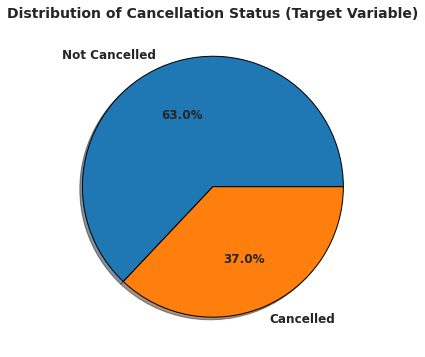

In [ ]:
plt.figure(figsize=(12,6))
proportion = df['is_canceled'].value_counts()
labels = ['Not Cancelled','Cancelled']
plt.title('Distribution of Cancellation Status (Target Variable)',fontsize = 14, weight = 'bold')
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'},textprops= { 'fontsize': 12,'weight' : 'bold'});

### 1.3.8 Checking Skewness of Attributes - Inferential Statistics

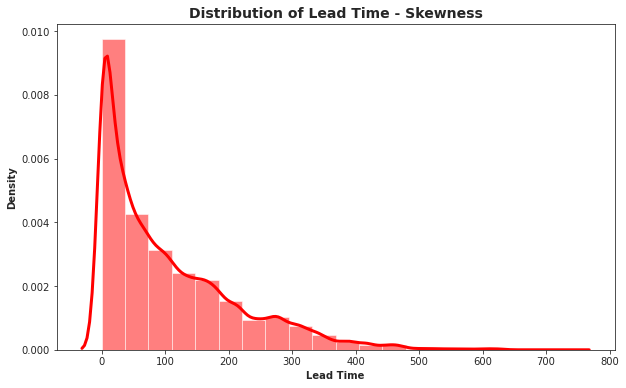

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(10,6))
sns.set_style('ticks')
ax = sns.distplot(df['lead_time'],bins = 20,color = 'r',kde_kws= {'lw': 3},hist_kws= {'alpha' : 0.5})
ax.set_title('Distribution of Lead Time - Skewness',fontsize = 14, weight='bold')
ax.set_xlabel("Lead Time",weight = 'bold')
ax.set_ylabel("Density",weight = 'bold');

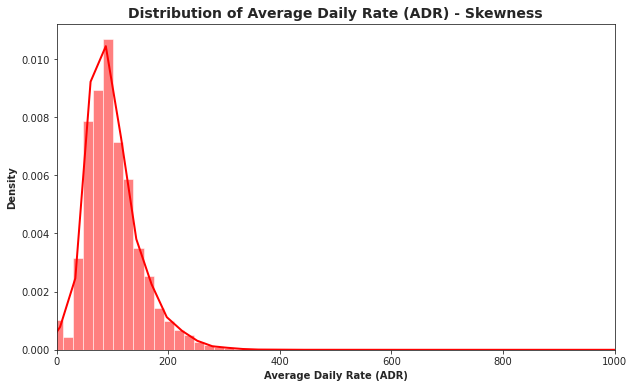

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('ticks')
ax = sns.distplot(df['adr'],bins = 300,color = 'r',kde_kws= {'lw': 2},hist_kws= {'alpha' : 0.5})
ax.set_title('Distribution of Average Daily Rate (ADR) - Skewness',fontsize = 14, weight='bold')
ax.set_xlabel("Average Daily Rate (ADR)",weight = 'bold')
ax.set_ylabel("Density",weight = 'bold')
ax.set(Xlim=(0,1000));

### 1.3.9 Data Visualization of Important Attributes 

1. Spatial Analysis of the Hotel Guests By their Home Countries

In [ ]:
country_df=df[df['is_canceled']==0]['country'].value_counts().reset_index()
country_df.columns=['Country','Guests']
country_df.head(5) 

,Country,Guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069


In [ ]:
import plotly.express as px
map_guest = px.choropleth(country_df,locations=country_df['Country'],color=country_df['Guests'], 
                    hover_name=country_df['Country'], title="Spatial Analysis of Home Countries of Hotel Guests",width = 900,height = 500)
map_guest.show()

2. Analyzing Top 10 Countries of Origin of Hotel Guests

In [ ]:
country_value = df['country'].value_counts(normalize = True)[:10]
country_value

PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
ITA    0.031673
IRL    0.028385
BEL    0.019697
BRA    0.018704
NLD    0.017695
Name: country, dtype: float64

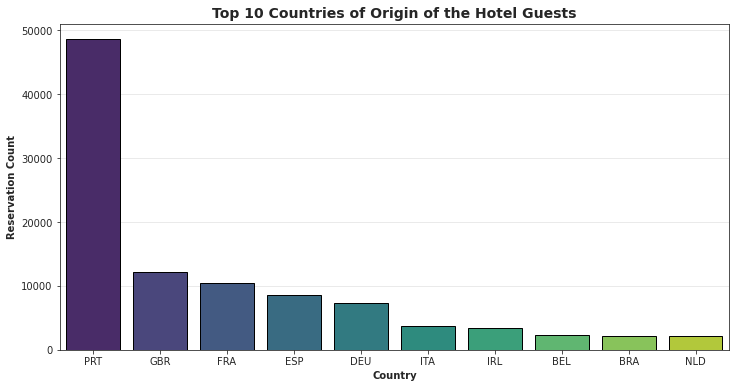

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(x='country', data=df,order=pd.value_counts(df['country']).iloc[:10].index,palette= 'viridis' , lw = 1, ec = 'black')
plt.grid(alpha = 0.5,axis = 'y')
ax.set_title('Top 10 Countries of Origin of the Hotel Guests',fontsize = 14, weight='bold')
ax.set_xlabel('Country',weight = 'bold')
ax.set_ylabel('Reservation Count',weight = 'bold');

3. Analyzing Most Occupied (Busiest) Month with Bookings at the Hotel

In [ ]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

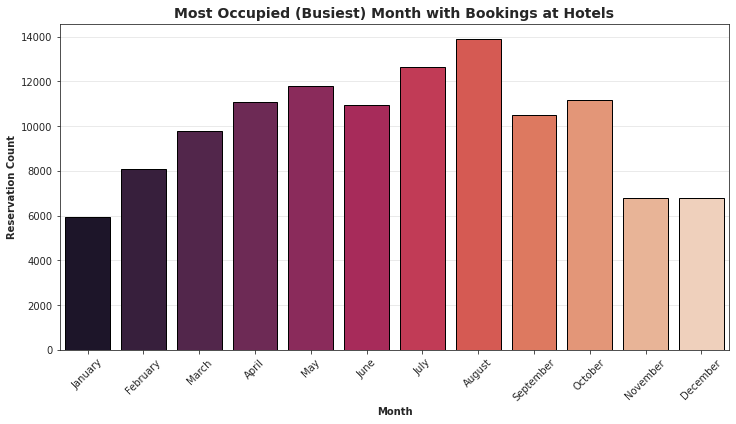

In [ ]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(x='arrival_date_month', data = df, palette= 'rocket',lw = 1, ec = 'black')
plt.grid(alpha = 0.5,axis = 'y')
ax.set_title('Most Occupied (Busiest) Month with Bookings at Hotels',fontsize = 14, weight='bold')
ax.set_xlabel('Month',weight = 'bold')
ax.set_ylabel('Reservation Count',weight = 'bold')
plt.xticks(rotation=45);

4. Analyzing Overall Bookings Cancelled at Both Hotels


In [ ]:
df['is_canceled'].value_counts(normalize = True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

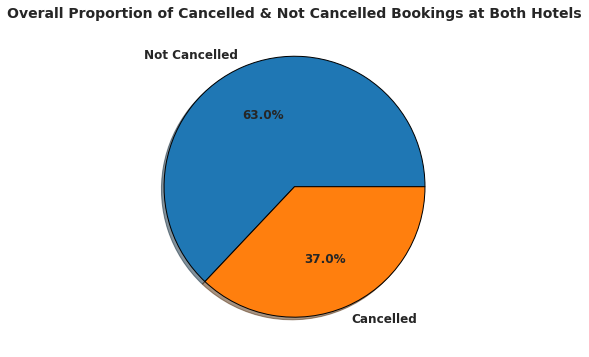

In [ ]:
plt.figure(figsize=(12,6))
proportion = df['is_canceled'].value_counts()
labels = ['Not Cancelled','Cancelled']
plt.title('Overall Proportion of Cancelled & Not Cancelled Bookings at Both Hotels',fontsize = 14, weight = 'bold')
plt.pie(proportion,labels=labels,shadow = True, autopct = '%1.1f%%',wedgeprops= {'edgecolor':'black'},textprops= { 'fontsize': 12,'weight' : 'bold'})
plt.show();

5. Analyzing how many Bookings were Cancelled by Hotel Type

In [ ]:
df.groupby('is_canceled')['hotel'].value_counts(normalize = True)

is_canceled  hotel       
0            City Hotel      0.615012
             Resort Hotel    0.384988
1            City Hotel      0.748508
             Resort Hotel    0.251492
Name: hotel, dtype: float64

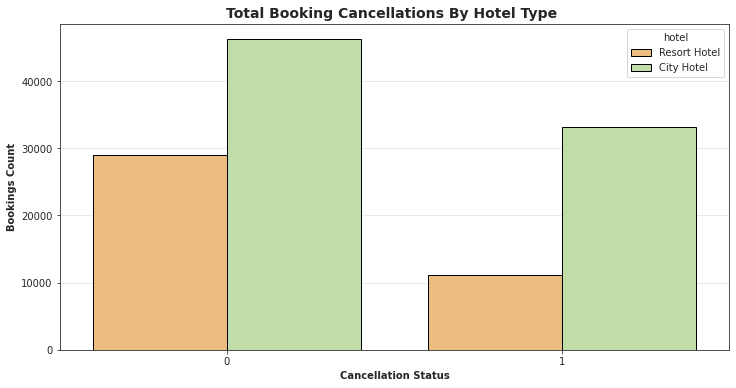

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(x= 'is_canceled',data = df,hue = 'hotel',palette= 'Spectral',lw = 1, ec = 'black')
ax.set_title("Total Booking Cancellations By Hotel Type ",fontsize = 14, weight='bold')
plt.grid(alpha = 0.5,axis = 'y')
ax.set_xlabel("Cancellation Status",weight = 'bold')
ax.set_ylabel("Bookings Count",weight = 'bold');

6. Analyzing Which Month has Highest Number of Cancellations By Hotel Type

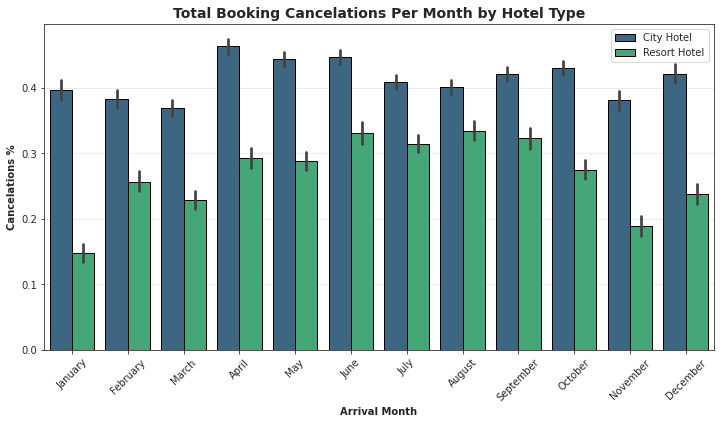

In [ ]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)

plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(x = "arrival_date_month", y = "is_canceled", hue="hotel",hue_order = ["City Hotel", "Resort Hotel"],data=df,
                 palette= 'viridis', edgecolor = 'black',linewidth = 1 )
ax.set_title("Total Booking Cancelations Per Month by Hotel Type",fontsize = 14, weight = 'bold')
ax.set_xlabel("Arrival Month", weight = 'bold')
ax.set_ylabel("Cancelations %", weight = 'bold')
plt.xticks(rotation=45)
plt.grid(alpha = 0.5,axis = 'y')
plt.legend(loc="upper right");

7. Analyzing Effect of Booking Cancellations by Market Segment

In [ ]:
pd.crosstab(df['is_canceled'],df['market_segment'])

market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
is_canceled,,,,,,,,
0,185,646,4303,10672,7714,15908,35738,0
1,52,97,992,1934,12097,8311,20739,2


In [ ]:
df.groupby('market_segment')['is_canceled'].value_counts(normalize = True)

market_segment  is_canceled
Aviation        0              0.780591
                1              0.219409
Complementary   0              0.869448
                1              0.130552
Corporate       0              0.812653
                1              0.187347
Direct          0              0.846581
                1              0.153419
Groups          1              0.610620
                0              0.389380
Offline TA/TO   0              0.656840
                1              0.343160
Online TA       0              0.632789
                1              0.367211
Undefined       1              1.000000
Name: is_canceled, dtype: float64

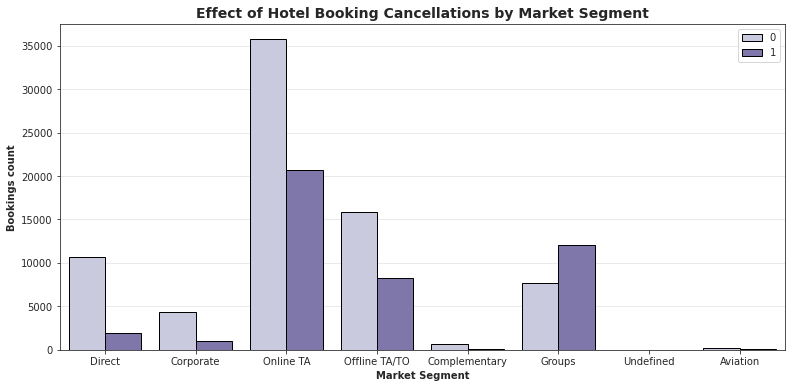

In [ ]:
plt.figure(figsize=(13,6))
sns.set_style('ticks')
ax = sns.countplot(x = "market_segment", hue = "is_canceled",data=df,palette= 'Purples',lw = 1, ec = 'black')
ax.set_title("Effect of Hotel Booking Cancellations by Market Segment", fontsize = 14,weight = 'bold')
ax.set_xlabel("Market Segment",weight = 'bold')
ax.set_ylabel("Bookings count",weight = 'bold')
plt.grid(alpha = 0.5,axis = 'y')
plt.legend(loc="upper right");

8. Analyzing Effect of Hotel Booking Cancellations by Customer Type 

In [ ]:
df['customer_type'].value_counts(normalize = True)

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64

In [ ]:
df.groupby('customer_type')['is_canceled'].value_counts(normalize = True)

customer_type    is_canceled
Contract         0              0.690383
                 1              0.309617
Group            0              0.897747
                 1              0.102253
Transient        0              0.592537
                 1              0.407463
Transient-Party  0              0.745701
                 1              0.254299
Name: is_canceled, dtype: float64

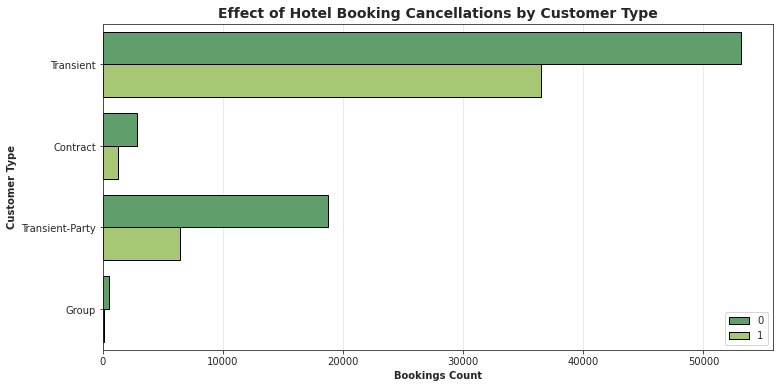

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(y = "customer_type", hue = "is_canceled",data=df,palette= 'summer',lw = 1, ec = 'black')
ax.set_title("Effect of Hotel Booking Cancellations by Customer Type", fontsize = 14,weight = 'bold')
ax.set_xlabel("Bookings Count",weight = 'bold')
ax.set_ylabel("Customer Type",weight = 'bold')
plt.legend(loc="lower right")
plt.grid(alpha = 0.5,axis = 'x');

9. Analyzing Effect of Hotel Booking Cancellations by Average Daily Rate (ADR) and Arrival Month

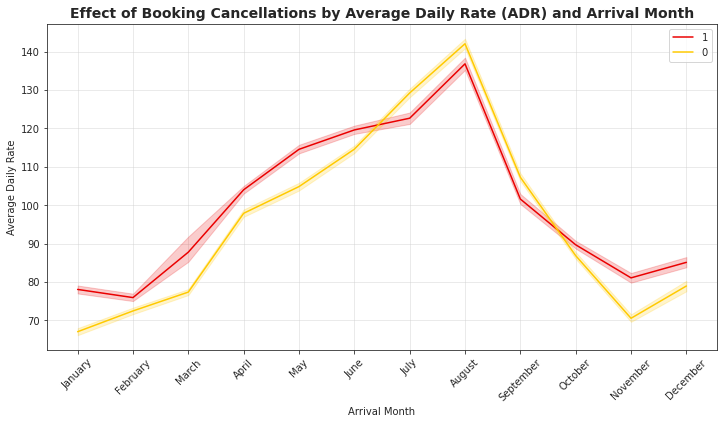

In [ ]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=ordered_months, ordered=True)

plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.lineplot(x = "arrival_date_month", y = "adr", hue="is_canceled",hue_order= [1,0],data=df, palette= 'hot')
ax.set_title("Effect of Booking Cancellations by Average Daily Rate (ADR) and Arrival Month", fontsize = 14, weight = 'bold')
ax.set_xlabel("Arrival Month")
ax.set_ylabel("Average Daily Rate")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.grid(alpha = 0.5);

10. Analyzing Effect of Hotel Booking Cancellations by Deposit Type

In [ ]:
df.groupby('deposit_type')['is_canceled'].value_counts(normalize = True)

deposit_type  is_canceled
No Deposit    0              0.716230
              1              0.283770
Non Refund    1              0.993624
              0              0.006376
Refundable    0              0.777778
              1              0.222222
Name: is_canceled, dtype: float64

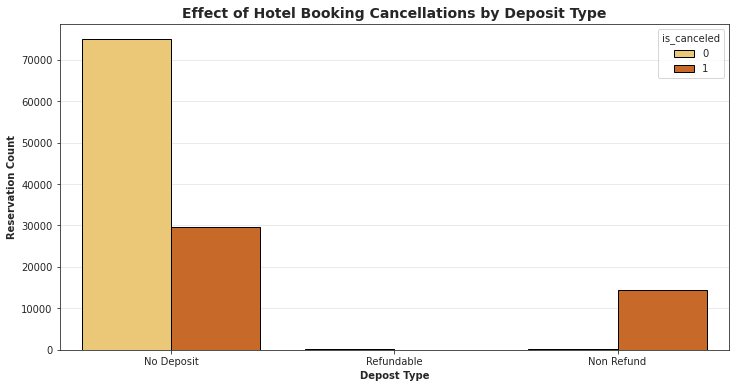

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
sns.countplot(x= 'deposit_type',hue = 'is_canceled',data = df,palette= 'YlOrBr',lw = 1, ec = 'black')
plt.title('Effect of Hotel Booking Cancellations by Deposit Type', fontsize = 14,weight = 'bold')
plt.xlabel('Depost Type',weight = 'bold')
plt.ylabel('Reservation Count',weight = 'bold')
plt.grid(alpha = 0.5,axis = 'y');

11. Analyzing Effect of Hotel Booking Cancellations by Repeated Guests

In [ ]:
df.groupby('is_repeated_guest')['is_canceled'].value_counts(normalize = True)

is_repeated_guest  is_canceled
0                  0              0.622149
                   1              0.377851
1                  0              0.855118
                   1              0.144882
Name: is_canceled, dtype: float64

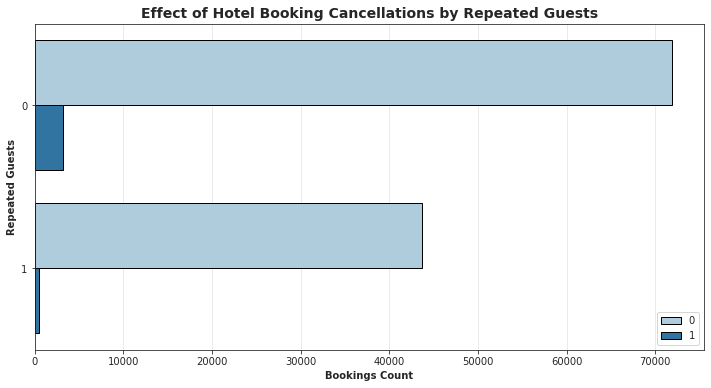

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(y= 'is_canceled',hue = 'is_repeated_guest',data = df,palette= 'Paired',lw = 1, ec = 'black')
ax.set_title('Effect of Hotel Booking Cancellations by Repeated Guests', fontsize = 14,weight = 'bold')
ax.set_xlabel("Bookings Count",weight = 'bold')
ax.set_ylabel("Repeated Guests",weight = 'bold')
plt.legend(loc="lower right")
plt.grid(alpha = 0.5,axis = 'x');

12.Analyzing Effect of Hotel Booking Cancellations by Special Requests

In [ ]:
df.groupby('total_of_special_requests')['is_canceled'].value_counts(normalize = True)

total_of_special_requests  is_canceled
0                          0              0.522796
                           1              0.477204
1                          0              0.779751
                           1              0.220249
2                          0              0.779011
                           1              0.220989
3                          0              0.821386
                           1              0.178614
4                          0              0.894118
                           1              0.105882
5                          0              0.950000
                           1              0.050000
Name: is_canceled, dtype: float64

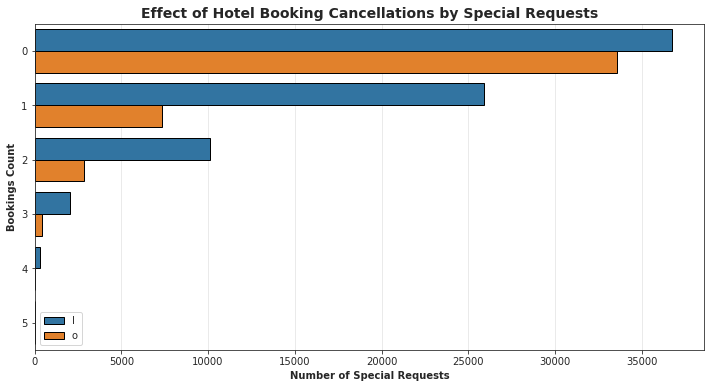

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
#ax = sns.countplot(x = "required_car_parking_spaces", hue = "is_canceled",data=df,palette= 'Dark2',lw = 1, ec = 'black')
ax = sns.countplot(y = "total_of_special_requests", hue = "is_canceled",data=df,palette= 'tab10',lw = 1, ec = 'black')
ax.set_title("Effect of Hotel Booking Cancellations by Special Requests", fontsize = 14, weight = 'bold')
ax.set_xlabel("Number of Special Requests",weight = 'bold')
ax.set_ylabel("Bookings Count",weight = 'bold')
plt.legend('lower right')
plt.grid(alpha = 0.5,axis = 'x');

13.Analyzing Effect of Hotel Booking Cancellations by Car Parking

In [ ]:
df.groupby('required_car_parking_spaces')['is_canceled'].value_counts(normalize = True)

required_car_parking_spaces  is_canceled
0                            0              0.605051
                             1              0.394949
1                            0              1.000000
2                            0              1.000000
3                            0              1.000000
8                            0              1.000000
Name: is_canceled, dtype: float64

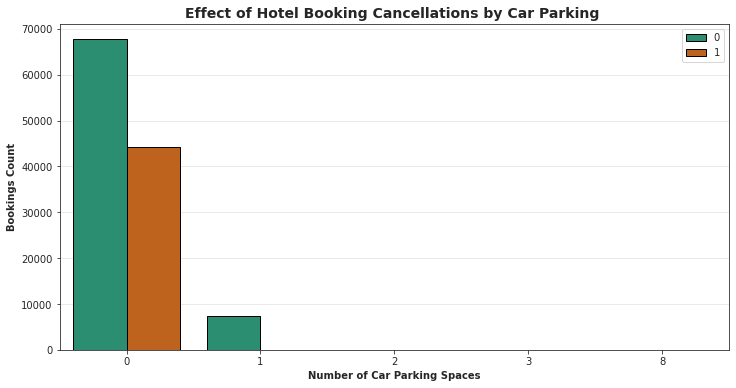

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(x = "required_car_parking_spaces", hue = "is_canceled",data=df,palette= 'Dark2',lw = 1, ec = 'black')
ax.set_title("Effect of Hotel Booking Cancellations by Car Parking ",fontsize = 14, weight = 'bold')
ax.set_xlabel("Number of Car Parking Spaces",weight = 'bold')
ax.set_ylabel("Bookings Count",weight = 'bold')
plt.legend(loc="Upper right")
plt.grid(alpha = 0.5,axis = 'y');

14. Analyzing Effect of Hotel Booking Cancellations by Meal Type

In [ ]:
df.groupby('meal')['is_canceled'].value_counts(normalize = True)

meal       is_canceled
BB         0              0.626151
           1              0.373849
FB         1              0.598997
           0              0.401003
HB         0              0.655397
           1              0.344603
SC         0              0.627606
           1              0.372394
Undefined  0              0.755346
           1              0.244654
Name: is_canceled, dtype: float64

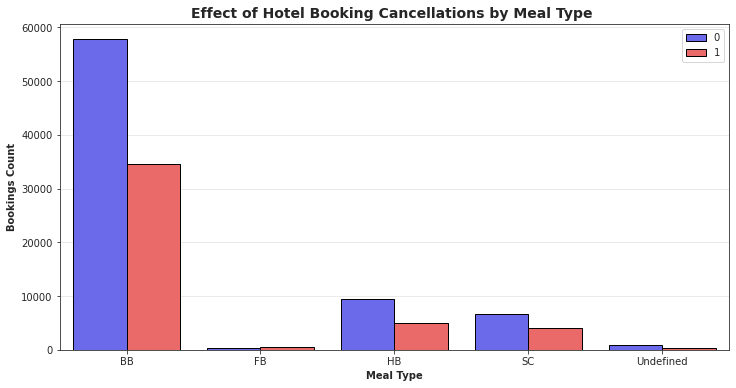

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(x = "meal", hue = "is_canceled",data=df,palette= 'seismic',lw = 1, ec = 'black')
ax.set_title("Effect of Hotel Booking Cancellations by Meal Type ", fontsize = 14, weight = 'bold')
ax.set_xlabel("Meal Type",weight = 'bold')
ax.set_ylabel("Bookings Count",weight = 'bold')
plt.legend(loc="Upper right")
plt.grid(alpha = 0.5,axis = 'y');

15. Analyzing Effect of Hotel Booking Cancellations by Booking Changes (Modifications)

In [ ]:
df.groupby('booking_changes')['is_canceled'].value_counts(normalize = True)[:6]

booking_changes  is_canceled
0                0              0.591458
                 1              0.408542
1                0              0.857728
                 1              0.142272
2                0              0.798686
                 1              0.201314
Name: is_canceled, dtype: float64

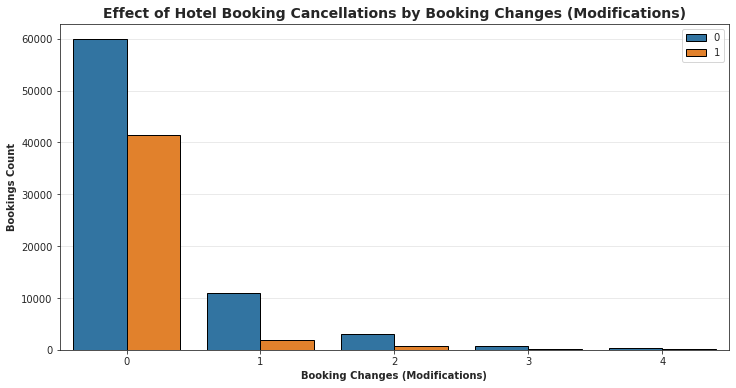

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.countplot(x= 'booking_changes',order=pd.value_counts(df['booking_changes']).iloc[:5].index,hue = 'is_canceled',data = df,lw = 1, ec = 'black')
ax.set_title("Effect of Hotel Booking Cancellations by Booking Changes (Modifications)",fontsize = 14, weight = 'bold')
ax.set_xlabel("Booking Changes (Modifications)",weight = 'bold')
ax.set_ylabel("Bookings Count",weight = 'bold')
plt.legend(loc="Upper right")
plt.grid(alpha = 0.5,axis = 'y');

16. Analyzing Effect of Average Daily Rate (ADR) by Market Type

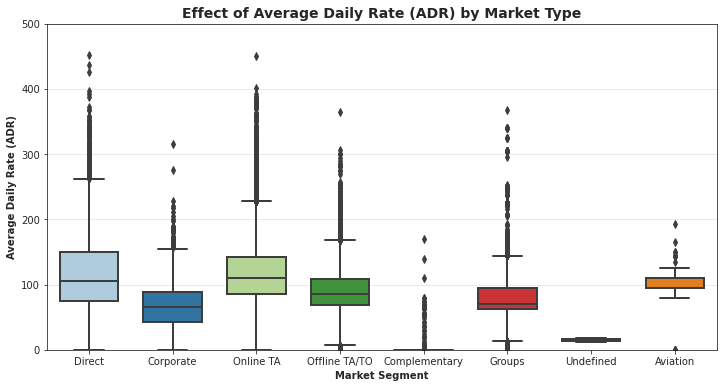

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.boxplot(x= 'market_segment',y = 'adr',data=df,width = 0.7,linewidth= 2,palette= 'Paired')
ax.set_title("Effect of Average Daily Rate (ADR) by Market Type", fontsize = 14,weight = 'bold')
ax.set_xlabel("Market Segment",weight = 'bold')
ax.set_ylabel("Average Daily Rate (ADR)",weight = 'bold')
plt.grid(alpha = 0.5,axis = 'y')
ax.set(ylim=(0,500));

17. Analyzing Effect of Average Daily Rate (ADR) by Deposit Type

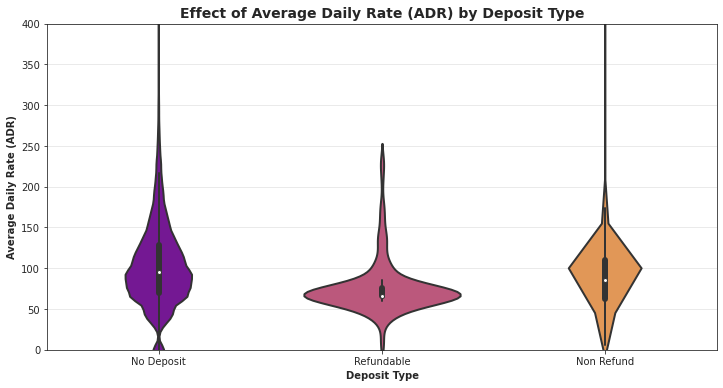

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.violinplot(x= 'deposit_type',y = 'adr',data=df,width = 0.7,linewidth= 2,palette= 'plasma')
ax.set_title("Effect of Average Daily Rate (ADR) by Deposit Type", fontsize = 14,weight = 'bold')
ax.set_xlabel("Deposit Type",weight = 'bold')
ax.set_ylabel("Average Daily Rate (ADR)",weight = 'bold')
plt.grid(alpha = 0.5,axis = 'y')
ax.set(ylim=(0,400));

18. Analyzing Effect of Average Daily Rate (ADR) by Customer Type

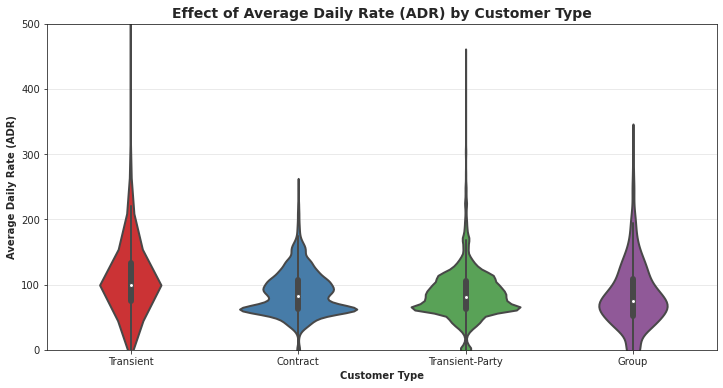

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.violinplot(x= 'customer_type',y = 'adr',data=df,width = 0.7,linewidth= 2,palette= 'Set1')
ax.set_title("Effect of Average Daily Rate (ADR) by Customer Type", fontsize = 14,weight = 'bold')
ax.set_xlabel("Customer Type",weight = 'bold')
ax.set_ylabel("Average Daily Rate (ADR)",weight = 'bold')
plt.grid(alpha = 0.5,axis = 'y')
ax.set(ylim=(0,500));

19. Analyzing Effect of Average Daily Rate (ADR) by Arrival Month

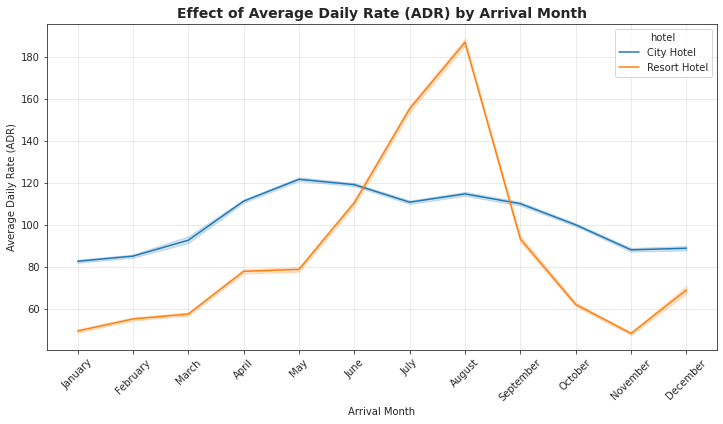

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=df, hue_order = ["City Hotel", "Resort Hotel"],palette= 'tab10')
ax.set_title("Effect of Average Daily Rate (ADR) by Arrival Month", fontsize = 14, weight = 'bold')
ax.set_xlabel("Arrival Month")
plt.xticks(rotation=45)
plt.grid(alpha = 0.5,axis = 'x')
plt.grid(alpha = 0.5,axis = 'y')
ax.set_ylabel("Average Daily Rate (ADR)");

20. Analyzing Relation between Lead Time vs Arrival Year By Booking Cancellations

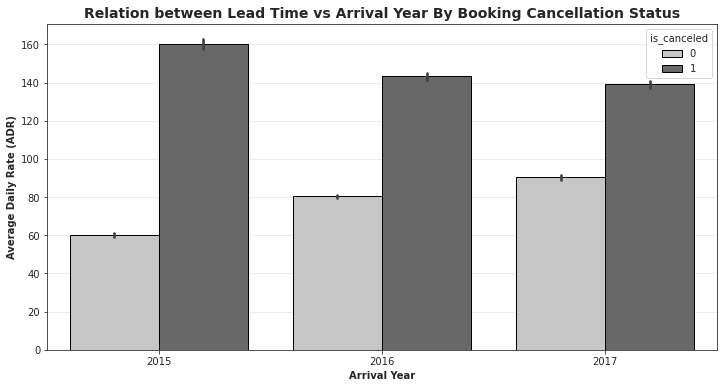

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(x='arrival_date_year', y ='lead_time',hue = 'is_canceled' ,data=df,palette= 'Greys',lw = 1, ec = 'black')
ax.set_title('Relation between Lead Time vs Arrival Year By Booking Cancellation Status',fontsize = 14, weight='bold')
ax.set_xlabel("Arrival Year",weight = 'bold')
ax.set_ylabel("Average Daily Rate (ADR)",weight = 'bold')
plt.grid(alpha = 0.5,axis = 'y');

21. Analyzing Relation between Lead Time vs Average Daily Rate By Booking Cancellation Status

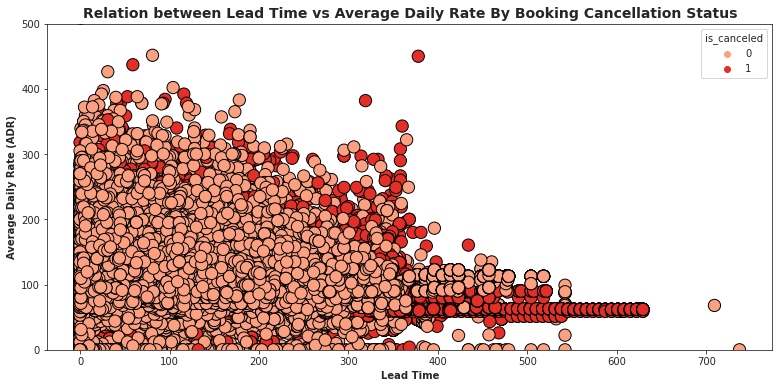

In [ ]:
plt.figure(figsize=(13,6))
sns.set_style('ticks')
ax = sns.scatterplot(x='lead_time', y ='adr',hue = 'is_canceled' ,data=df,s = 150,palette= 'Reds',edgecolor = 'black')
ax.set_title('Relation between Lead Time vs Average Daily Rate By Booking Cancellation Status',fontsize = 14, weight='bold')
ax.set_xlabel("Lead Time",weight = 'bold')
ax.set_ylabel("Average Daily Rate (ADR)",weight = 'bold')
ax.set(ylim=(0,500));

## 1.4 Data Preparation

1. Handling Missing Values in the dataset
2. Feature Encoding Categorial Attributes 
3. Handling Skewness of Attributes
4. Correlation between Independent and Dependent features
5. Removing Irrelevant Attributes

### 1.4.1 Handling Missing Values

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_nan:
    print('{} : {}% Missing values'.format(feature,np.around(df[feature].isnull().mean(),4)))

children : 0.0% Missing values
country : 0.0041% Missing values
agent : 0.1369% Missing values
company : 0.9431% Missing values


From the above Analysis, it shows percentage of missing values in feature.


- "Company" feature has almost 94% missing values. Therefore, we do not have enough values to fill the rows or Impute the company column by mean, median etc. Hence we can drop the "Company" feature.
- "Agent" feature has 13.69% missing values. "Agent" feature is travel agency Id and these values are unique and we cannot impute Id by mean, median or mode. Since, missing values are 13% of all data we can't drop them. Therefore, missing data for "Agent" can be filled by 0.
-"Country" feature has 0.4% missing values. Since missing data of "Country" is less than 1%, we can will impute with most frequent value (Mode).
- "Children" feature has only 4 missing values and we can fill these missing values by 0 considering guests have no children.

In [ ]:
#Dropping the "Company" feature
df.drop(columns = ['company'],inplace= True)

In [ ]:
#Filling missing values by 0 for "Agent" feature
df['agent']= df['agent'].fillna(0)

In [ ]:
#Imputing missing values of "Country" feature
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [ ]:
#Filling missing values by 0 for "Children" feature 
df['children']= df['children'].fillna(0)

All missing values in the data set are handled succcessfully

In [ ]:
df1 = df.copy()

### 1.4.2 Feature Encoding (Encoding Categorical Variables)

In [ ]:
cat_feature = [feature for feature in df1.columns if df1[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  12


In [ ]:
print(cat_feature)

['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [ ]:
df1[cat_feature][:3]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02


Let us check how many unique (Distinct) labels exists in each categorical features

In [ ]:
for feature in cat_feature:
    print("{} : {} labels ".format(feature,len(df1[feature].unique())))

hotel : 2 labels 
arrival_date_month : 12 labels 
meal : 5 labels 
country : 177 labels 
market_segment : 8 labels 
distribution_channel : 5 labels 
reserved_room_type : 10 labels 
assigned_room_type : 12 labels 
deposit_type : 3 labels 
customer_type : 4 labels 
reservation_status : 3 labels 
reservation_status_date : 926 labels 


In [ ]:
#Custom mapping
df1['hotel'] = df1['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
df1['arrival_date_month'] = df1['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [ ]:
#Replacing "Undefined" with "SC" as mentioned in data set description
df1["meal"].replace("Undefined", "SC", inplace=True)

In [ ]:
#Applying label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1['meal'] = le.fit_transform(df1['meal'])
df1['deposit_type'] = le.fit_transform(df1['deposit_type'])
df1['customer_type'] = le.fit_transform(df1['customer_type'])
df1['market_segment'] = le.fit_transform(df1['market_segment'])
df1['distribution_channel'] = le.fit_transform(df1['distribution_channel'])
df1['reserved_room_type'] = le.fit_transform(df1['reserved_room_type'])
df1['assigned_room_type']= le.fit_transform(df1['assigned_room_type'])
df1['reservation_status'] = le.fit_transform(df1['reservation_status'])
df1['reservation_status_date'] = le.fit_transform(df1['reservation_status_date'])
df1['country'] = le.fit_transform(df1['country'])

In [ ]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0,2,0.0,0,0,1,121
1,0,0,737,2015,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0,2,0.0,0,0,1,121
2,0,0,7,2015,7,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0,2,75.0,0,0,1,122
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0,1,122
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1,1,123


In [ ]:
df1.shape

(119390, 31)

In [ ]:
clean_df = df1.copy()

### 1.4.3 Handling Skewness of the Attributes

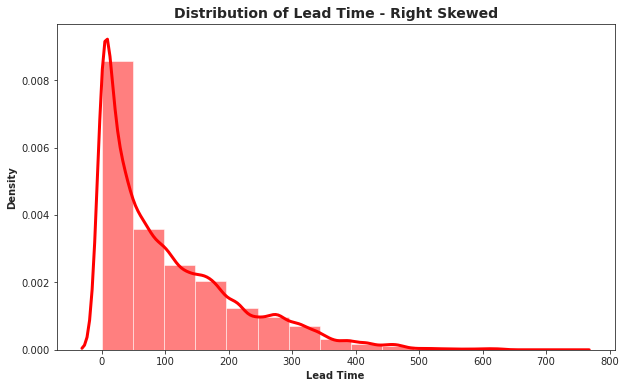

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(10,6))
sns.set_style('ticks')
ax = sns.distplot(clean_df['lead_time'],bins = 15,color = 'r',kde_kws= {'lw': 3},hist_kws= {'alpha' : 0.5})
ax.set_title('Distribution of Lead Time - Right Skewed',fontsize = 14, weight='bold')
ax.set_xlabel("Lead Time",weight = 'bold')
ax.set_ylabel("Density",weight = 'bold');

We can see that feature"Lead Time " is right-skewed so we will apply a logarithmic transformation using numpy's log1p method. This applies the equavelent of log(1+x) to the variables where x is a value in the data

In [ ]:
import numpy as np

def handle_outlier(col):
    clean_df[col]=np.log1p(clean_df[col])

In [ ]:
handle_outlier('lead_time')

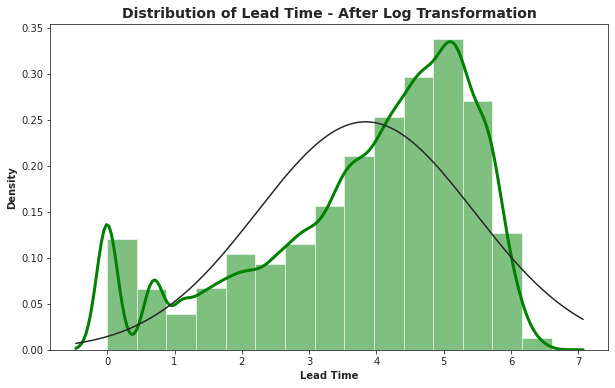

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('ticks')
ax = sns.distplot(clean_df['lead_time'],bins = 15,color = 'g',fit = norm, kde_kws= {'lw': 3},hist_kws= {'alpha' : 0.5})
ax.set_title('Distribution of Lead Time - After Log Transformation',fontsize = 14, weight='bold')
ax.set_xlabel("Lead Time",weight = 'bold')
ax.set_ylabel("Density",weight = 'bold');

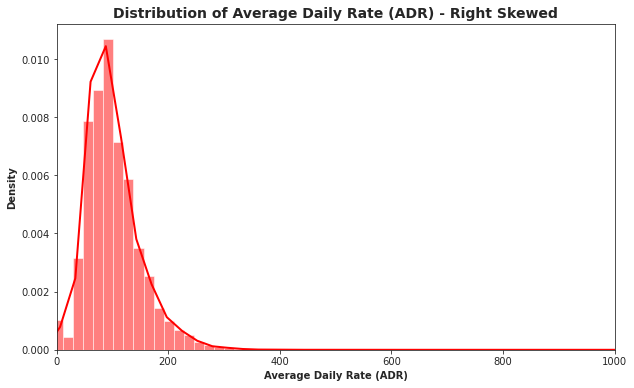

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('ticks')
ax = sns.distplot(clean_df['adr'],bins = 300,color = 'r',kde_kws= {'lw': 2},hist_kws= {'alpha' : 0.5})
ax.set_title('Distribution of Average Daily Rate (ADR) - Right Skewed',fontsize = 14, weight='bold')
ax.set_xlabel("Average Daily Rate (ADR)",weight = 'bold')
ax.set_ylabel("Density",weight = 'bold')
ax.set(Xlim=(0,1000));

In [ ]:
handle_outlier('adr')

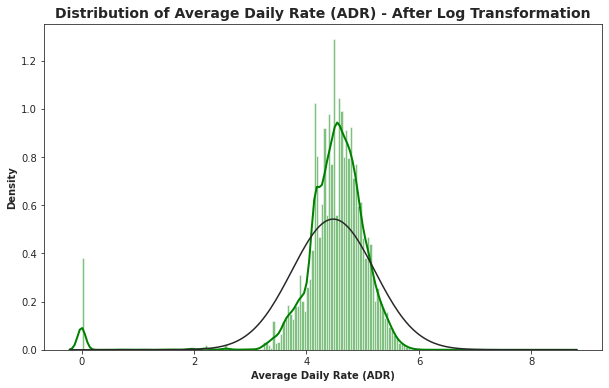

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style('ticks')
ax = sns.distplot(clean_df['adr'],bins = 200,color = 'g',fit = norm,kde_kws= {'lw': 2},hist_kws= {'alpha' : 0.5})
ax.set_title('Distribution of Average Daily Rate (ADR) - After Log Transformation',fontsize = 14, weight='bold')
ax.set_xlabel("Average Daily Rate (ADR)",weight = 'bold')
ax.set_ylabel("Density",weight = 'bold');

In [ ]:
df2 = clean_df.copy()

### 1.4.4 Relationship between independent and dependent feature (Correlation Heat map)

In [ ]:
df2.corr()["is_canceled"].sort_values(ascending = False)

is_canceled                       1.000000
deposit_type                      0.468634
lead_time                         0.320063
country                           0.267502
distribution_channel              0.167600
hotel                             0.136531
previous_cancellations            0.110133
adr                               0.083091
adults                            0.060017
market_segment                    0.059338
days_in_waiting_list              0.054186
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_month                0.011022
arrival_date_week_number          0.008148
children                          0.005036
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
meal                             -0.015693
babies                           -0.032491
agent                            -0.046529
previous_bookings_not_canceled   -0.057358
reserved_room_type               -0.061282
customer_ty

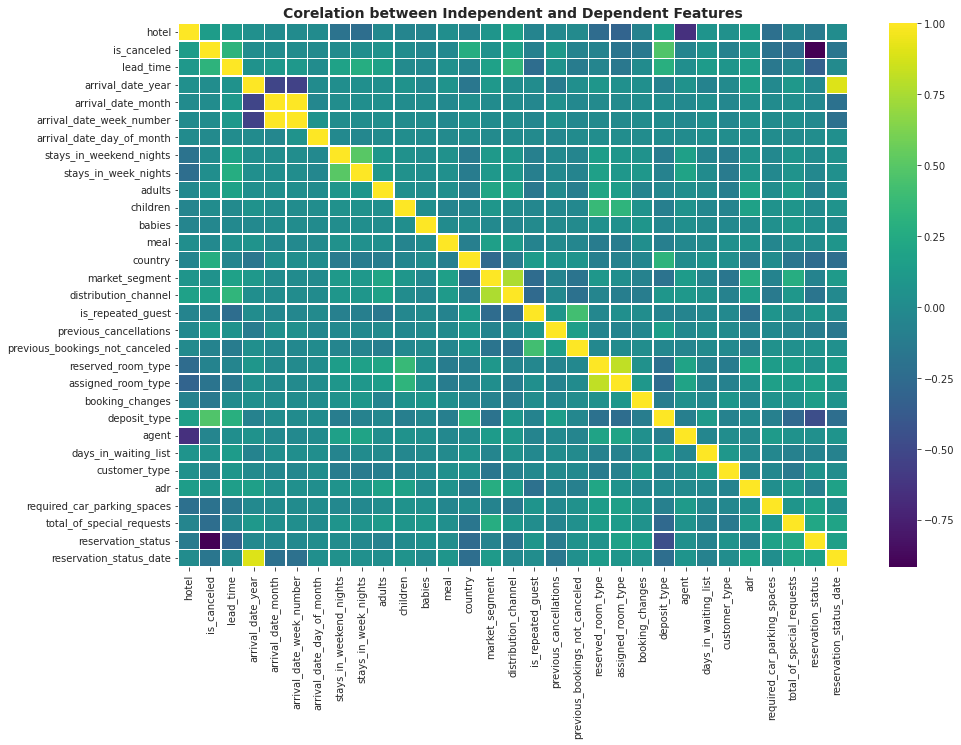

In [ ]:
plt.figure(figsize = (15,10))
ax = sns.heatmap(df2.corr(), cmap="viridis",linewidths=0.5)
ax.set_title('Corelation between Independent and Dependent Features',fontsize = 14, weight='bold');

- "reservation_status" seems to be most impactful feature and because of its negative correlation with the "is_canceled" feature it can cause a wrong prediction or overfitting and there is chance of data leakage. Hence I will drop this feature.
- I will not use arrival_date_week_number, arrival_date_month, arrival_date_year,stays_in_week_nights, stays_in_weekend_nights since their importances are really low while predicting cancellations.
- "reservation_status_date" is date type data and it could not convert another type, this feature can also be dropped

### 1.4.5 Removing Irrelevant Attributes

In [ ]:
df2.drop(columns = ['reservation_status','arrival_date_week_number','arrival_date_month','arrival_date_year',
                    'stays_in_week_nights','stays_in_weekend_nights','reservation_status_date'],inplace = True)

In [ ]:
df3 = df2.copy()

In [ ]:
df3.head()

,hotel,is_canceled,lead_time,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,5.837730,1,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0,2,0.000000,0,0
1,0,0,6.603944,1,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0,2,0.000000,0,0
2,0,0,2.079442,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0,2,4.330733,0,0
3,0,0,2.639057,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,4.330733,0,0
4,0,0,2.708050,1,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,4.595120,0,1


In [ ]:
df3.shape

(119390, 24)

In [ ]:
df3.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_day_of_month         0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [ ]:
df3.dropna(inplace = True)

In [ ]:
x = df3.drop(['is_canceled'], axis=1)
y = df['is_canceled']

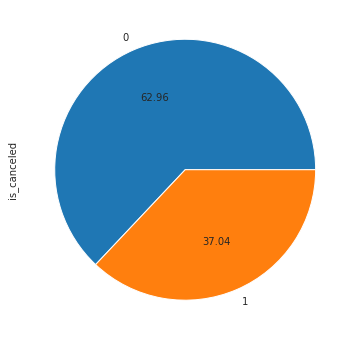

In [ ]:
#Class distribution
plt.figure(figsize=(12,6))
y.value_counts().plot.pie(autopct='%.2f')

## 1.5 Modeling

1.   Algorithm Selection
2.   Train - Test Split
3.   Model Fitting
4.   Models Accuracy Scores on Train and Test Data
5.   Hyperparameter Tuning using Grid Search CV on all models
6.   Applying Stratified Kfold Cross-Validation to know the exact Mean CV Accuracy Score



### 1.5.1 Train - Test Split

In [ ]:
X = df3.drop(['is_canceled'], axis=1)
y = df3['is_canceled']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((89541, 23), (89541,), (29848, 23), (29848,))

In [ ]:
# Import the scikit-learn class used to train a logistic regression model
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(random_state= 42)
lreg.fit(X_train,y_train)

print("Logistic Regression Accuracy Score (Train) :", lreg.score(X_train,y_train))
print("Logistic Regression Accuracy Score (Test) :",lreg.score(X_test,y_test))

Logistic Regression Accuracy Score (Train) : 0.7770741894774461
Logistic Regression Accuracy Score (Test) : 0.7761994103457518


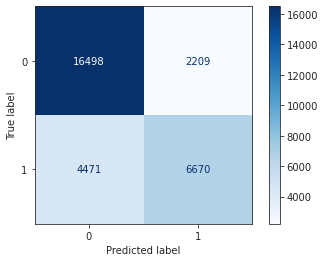

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# pass it a trained model: it makes predictions for X_test and compares them to y_test
lreg_cm = plot_confusion_matrix(lreg, X_test, y_test, cmap='Blues', values_format='d');


In [ ]:
# print the "normal" confusion matrix
lreg_cm.confusion_matrix

array([[16498,  2209],
       [ 4471,  6670]])

In [ ]:
from sklearn.metrics import classification_report

y_pred = lreg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83     18707
           1       0.75      0.60      0.67     11141

    accuracy                           0.78     29848
   macro avg       0.77      0.74      0.75     29848
weighted avg       0.77      0.78      0.77     29848



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

print("KNN Classifier Accuracy Score (Train) :", knn.score(X_train,y_train))
print("KNN Classifier Accuracy Score (Test) :", knn.score(X_test,y_test))

KNN Classifier Accuracy Score (Train) : 0.8850582414759719
KNN Classifier Accuracy Score (Test) : 0.8288327526132404


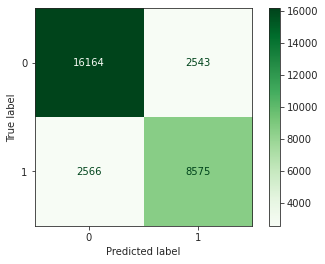

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# pass it a trained model: it makes predictions for X_test and compares them to y_test
knn_cm = plot_confusion_matrix(knn, X_test, y_test, cmap='Greens', values_format='d')

In [ ]:
# print the "normal" confusion matrix
knn_cm.confusion_matrix

array([[16164,  2543],
       [ 2566,  8575]])

In [ ]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     18707
           1       0.77      0.77      0.77     11141

    accuracy                           0.83     29848
   macro avg       0.82      0.82      0.82     29848
weighted avg       0.83      0.83      0.83     29848



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 42)
dt_model.fit(X_train,y_train)

print("Decision Tree Classifier Accuracy Score (Train) :", dt_model.score(X_train,y_train))
print("Decision Tree Classifier Accuracy Score (Test) :",dt_model.score(X_test,y_test))

Decision Tree Classifier Accuracy Score (Train) : 0.9961135122457868
Decision Tree Classifier Accuracy Score (Test) : 0.8453497721790405


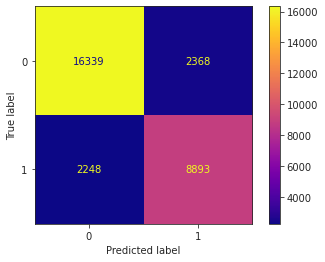

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# pass it a trained model: it makes predictions for X_test and compares them to y_test
dt_cm = plot_confusion_matrix(dt_model, X_test, y_test, cmap='plasma', values_format='d')

In [ ]:
# print the "normal" confusion matrix
dt_cm.confusion_matrix

array([[16339,  2368],
       [ 2248,  8893]])

In [ ]:
from sklearn.metrics import classification_report

y_pred = dt_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     18707
           1       0.79      0.80      0.79     11141

    accuracy                           0.85     29848
   macro avg       0.83      0.84      0.84     29848
weighted avg       0.85      0.85      0.85     29848



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state =42)
rf_model.fit(X_train,y_train)

print("Random Forest Classifier Accuracy Score (Train) :", rf_model.score(X_train,y_train))
print("Random Forest Classifier Accuracy Score (Test) :",rf_model.score(X_test,y_test))

Random Forest Classifier Accuracy Score (Train) : 0.9961135122457868
Random Forest Classifier Accuracy Score (Test) : 0.8869270972929509


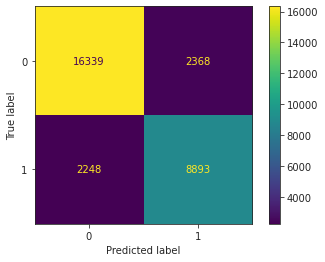

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# pass it a trained model: it makes predictions for X_test and compares them to y_test
rf_cm = plot_confusion_matrix(rf_model, X_test, y_test, cmap='viridis', values_format='d')

In [ ]:
# print the "normal" confusion matrix
rf_cm.confusion_matrix

array([[16339,  2368],
       [ 2248,  8893]])

In [ ]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     18707
           1       0.88      0.81      0.84     11141

    accuracy                           0.89     29848
   macro avg       0.89      0.87      0.88     29848
weighted avg       0.89      0.89      0.89     29848



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train,y_train)

print("XGBoost Classifier Accuracy Score (Train) :", xgb.score(X_train,y_train))
print("XGBoost Classifier Accuracy Score (Test) :", xgb.score(X_test,y_test))

XGBoost Classifier Accuracy Score (Train) : 0.843736388916809
XGBoost Classifier Accuracy Score (Test) : 0.8412958992227285


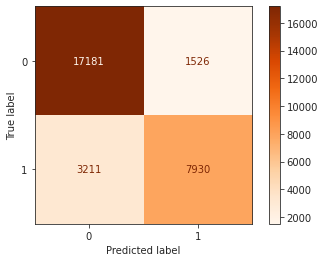

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# pass it a trained model: it makes predictions for X_test and compares them to y_test
xgb_cm = plot_confusion_matrix(xgb, X_test, y_test, cmap='Oranges', values_format='d')

In [ ]:
# print the "normal" confusion matrix
xgb_cm.confusion_matrix

array([[17181,  1526],
       [ 3211,  7930]])

In [ ]:
from sklearn.metrics import classification_report

y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     18707
           1       0.84      0.71      0.77     11141

    accuracy                           0.84     29848
   macro avg       0.84      0.82      0.82     29848
weighted avg       0.84      0.84      0.84     29848



### 1.5.2 Applying Hyper Parameter Tuning using Grid SeachCV 

In [ ]:
param_grid = [{'penalty': ['l1','l2'],'C': [1,10,100],'max_iter': [100,1000],'solver': ['lbfgs','newton_cg']}]

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=lreg, param_grid = param_grid, cv = 10, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
print('Logistic Regression Best score: {} using best parameters {}'.format(best_clf.best_score_, best_clf.best_params_))

Logistic Regression Best score: 0.7984387290234709 using best parameters {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
param_grid = {'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=knn, param_grid = param_grid, cv = 10, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
print('KNN Classifier Best score: {} using best parameters {}'.format(best_clf.best_score_, best_clf.best_params_))

KNN Classifier Best score: 0.8432674066981969 using best parameters {'n_neighbors': 6, 'weights': 'distance'}


In [ ]:
param_grid= { 'criterion' : ['gini', 'entropy'],'min_samples_split' : [2,4,6,8],
              'min_samples_leaf': [1,2,3,4,5],'max_features' : ['auto', 'sqrt']}

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=dt_model, param_grid = param_grid, cv = 10, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
print('Decision Tree Best score: {} using best parameters {}'.format(best_clf.best_score_, best_clf.best_params_))

Decision Tree Best score: 0.8466735833387273 using best parameters {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
param_grid = {'n_estimators' : [10,100,200],'min_samples_split' : [1,2,5],
              'min_samples_leaf': [1,2,5],'max_depth' : [5,8,15,25]}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=rf_model, param_grid = param_grid, cv = 10, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
print('Random Forest Best score: {} using best parameters {}'.format(best_clf.best_score_, best_clf.best_params_))

Random Forest Best score: 0.8844887056581895 using best parameters {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
param_grid ={'max_depth':[5,10,15],'n_estimators': [10,100],'gamma': [0.05, 0.1]}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator= xgb, param_grid = param_grid, cv = 10, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
print('XGBOOST Best score: {} using best parameters {}'.format(best_clf.best_score_, best_clf.best_params_))

XGBOOST Best score: 0.8835952651850322 using best parameters {'gamma': 0.05, 'max_depth': 15, 'n_estimators': 100}


### 1.5.3 Applying StratifiedKfold Cross Validation Technique on all 5 algorithms to know the exact mean CV accuracy score of the models

**Impute the best parameters obtained in hyper tuning tuning for respective alogorithms**

In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 42)

lreg_cv_result = cross_val_score(LogisticRegression(C = 10, max_iter = 1000,penalty = 'l2',solver = 'lbfgs'),
                            X, y, cv=skfold,scoring="accuracy",n_jobs=-1)
lreg_cv = lreg_cv_result.mean()*100
print('Logistic Regression CV Mean Accuarcy Score is {}'.format(lreg_cv))

Logistic Regression CV Mean Accuarcy Score is 79.89932573285957


In [ ]:
knn_cv_result = cross_val_score(KNeighborsClassifier(n_neighbors=6,weights = 'distance'),
                            X, y, cv=skfold,scoring="accuracy",n_jobs=-1)
knn_cv = knn_cv_result.mean()*100
print('KNeighbors Classifier CV Mean Accuarcy Score is {}'.format(knn_cv))

KNeighbors Classifier CV Mean Accuarcy Score is 85.17032391621726


In [ ]:
dt_cv_result = cross_val_score(DecisionTreeClassifier(criterion = 'entropy',max_features = 'auto',
                                                   min_samples_leaf = 1,min_samples_split = 2), 
                            X, y, cv=skfold,scoring="accuracy",n_jobs=-1)
dt_cv = dt_cv_result.mean()*100
print('Decision Tree Classifier CV Mean Accuarcy Score is {}'.format(dt_cv))

Decision Tree Classifier CV Mean Accuarcy Score is 85.01202123527048


In [ ]:
rf_cv_result = cross_val_score(RandomForestClassifier(max_depth = 25,min_samples_leaf= 1,
                                                   min_samples_split = 2,n_estimators = 200),
                            X, y, cv=skfold,scoring="accuracy",n_jobs=-1)
rf_cv = rf_cv_result.mean()*100
print('Random Forest Classifier CV Mean Accuarcy Score is {}'.format(rf_cv))

Random Forest Classifier CV Mean Accuarcy Score is 88.7703241603802


In [ ]:
xgb_cv_result = cross_val_score(XGBClassifier(n_estimators = 100,max_depth = 15,gamma = 0.05),
                            X, y, cv=skfold,scoring="accuracy",n_jobs=-1)
xgb_cv = xgb_cv_result.mean()*100
print('XGBOOST Classifier CV Mean Accuarcy Score is {}'.format(xgb_cv))

XGBOOST Classifier CV Mean Accuarcy Score is 88.46124989161763


### 1.5.4 Cross-Validation Mean Accuracy Scores of the Models

In [ ]:
Model = ['Logistic Regression','KNN Classifier','Decision Tree Classifier','Random Forest Classifier','XGBoost Classifier']
df_model = pd.DataFrame(Model)

In [ ]:
Scores = [lreg_cv,knn_cv,dt_cv,rf_cv,xgb_cv]
df_score = pd.DataFrame(Scores)

In [ ]:
df_list = [df_model,df_score]
df_cv_score = pd.concat(df_list,axis = 1) 

In [ ]:
df_cv_score.columns= ['Model','CV_Accuracy_Mean_Score']
df_cv_score.sort_values(by = 'CV_Accuracy_Mean_Score',ignore_index= True)

,Model,CV_Accuracy_Mean_Score
0,Logistic Regression,79.899326
1,Decision Tree Classifier,85.012021
2,KNN Classifier,85.170324
3,XGBoost Classifier,88.461250
4,Random Forest Classifier,88.770324


### 1.5.5 Feature Selection

In [ ]:
rf_model.feature_importances_

array([0.00914136, 0.16164377, 0.08493767, 0.01448614, 0.00691773,
       0.0010421 , 0.01350978, 0.12604303, 0.05266849, 0.0113072 ,
       0.00215882, 0.03211185, 0.00500459, 0.01700243, 0.02823209,
       0.0229461 , 0.11879054, 0.06149058, 0.00284112, 0.02796166,
       0.11434884, 0.02434795, 0.06106616])

In [ ]:
#Convert this into a dataframe and visualize the most important features
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

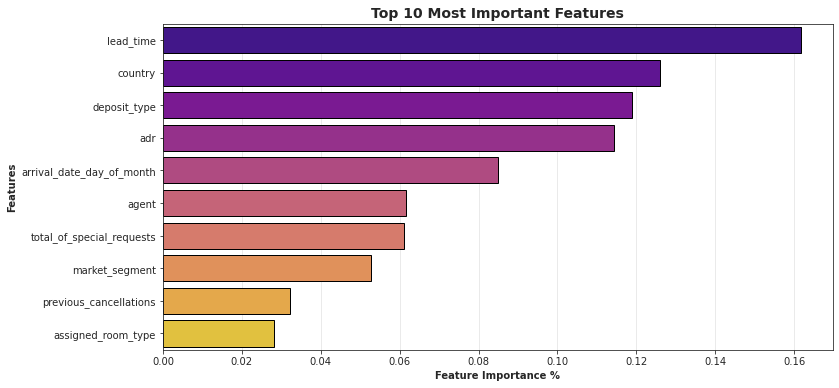

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df.head(10), x='importance', y='feature',palette= 'plasma',edgecolor = 'black',linewidth = 1)
ax.set_title('Top 10 Most Important Features', weight='bold',fontsize = 14)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')
plt.grid(alpha = -1.5,axis = 'x')

In [ ]:
df4 = df3.copy()

In [ ]:
df4.head(3)

,hotel,is_canceled,lead_time,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,5.837730,1,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,0.0,0,2,0.000000,0,0
1,0,0,6.603944,1,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,0.0,0,2,0.000000,0,0
2,0,0,2.079442,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,0.0,0,2,4.330733,0,0


In [ ]:
df4.shape

(119389, 24)

# 1.6 Model Deployment

Inorder to build the web app, I will use the 10 most important features that are helpful in predicting the cancelation from the guests since we it would be pain to front end user to fill all 23 features on the web app. I will drop the rest of features so we can build an interactive and user friendly web app.

In [ ]:
X = df4.drop(['is_canceled','hotel','arrival_date_day_of_month','adults','children','babies','meal','country',
              'distribution_channel','is_repeated_guest','previous_bookings_not_canceled','reserved_room_type','agent','days_in_waiting_list'],axis = 1)

y = df4['is_canceled']

In [ ]:
#Train and test data again to check if there is any drop in accuracy of the model after eliminating features
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,stratify = y,test_size = 0.25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state =42)
rf_model.fit(X_train,y_train)

print("Random Forest Classifier Accuracy Score (Train) :", rf_model.score(X_train,y_train))
print("Random Forest Classifier Accuracy Score (Test) :",rf_model.score(X_test,y_test))

Random Forest Classifier Accuracy Score (Train) : 0.9801878469081203
Random Forest Classifier Accuracy Score (Test) : 0.8396877512731171


In [ ]:
#Compresssing the pickle file which has 10 features to build Web Application
import bz2,pickle
file = bz2.BZ2File('modelfinal.pkl','wb')
pickle.dump(rf_model,file)
file.close()